# Estado estacionario y tiempo medio de retorno  
## Dinámica de canales de adquisición digital
---

Una empresa de e-commerce analiza cómo los clientes potenciales se mueven entre diferentes **canales digitales** antes de realizar una compra.

Los tres canales principales son:
- **Redes Sociales (RS)**: Instagram, Facebook, TikTok
- **Búsqueda Orgánica (BO)**: Google, SEO
- **Publicidad Pagada (PP)**: Google Ads, Facebook Ads

Un cliente puede:
- Interactuar con el mismo canal varias veces
- Pasar de un canal a otro durante su journey de compra
- Eventualmente realizar una compra (no modelado aquí)

El equipo de marketing digital rastreó 10,000 interacciones de usuarios durante 3 meses y determinó las siguientes **probabilidades de transición**:

| De / Hacia | Redes Sociales (RS) | Búsqueda Orgánica (BO) | Publicidad Pagada (PP) |
|------------|---------------------|------------------------|------------------------|
| **Redes Sociales (RS)** | 0.60 | 0.25 | 0.15 |
| **Búsqueda Orgánica (BO)** | 0.20 | 0.65 | 0.15 |
| **Publicidad Pagada (PP)** | 0.30 | 0.35 | 0.35 |

**Interpretación:**
- Un usuario que interactúa con Redes Sociales tiene 60% de probabilidad de volver a interactuar con RS en su próxima sesión
- 25% de probabilidad de pasar a Búsqueda Orgánica
- 15% de probabilidad de ver/hacer clic en Publicidad Pagada

---

## Representación de la dinámica como cadena de Markov

La evolución del journey del cliente puede representarse con una **matriz de transición**:

$$
P =
\begin{array}{c@{\,}c}
& \begin{matrix} \text{RS} & \text{BO} & \text{PP} \end{matrix} \\[5pt]
\begin{matrix} \text{RS} \\ \text{BO} \\ \text{PP} \end{matrix}
&
\begin{pmatrix}
0.60 & 0.25 & 0.15 \\
0.20 & 0.65 & 0.15 \\
0.30 & 0.35 & 0.35
\end{pmatrix}
\end{array}
$$

Cada elemento $p_{ij}$ indica la probabilidad de que un usuario pase del canal $i$ al canal $j$ en su siguiente interacción.

---

## Distribución de interacciones en 5 y 10 sesiones

Actualmente, la empresa tiene la siguiente distribución de **primeras interacciones** del día:

$$
\text{Distribución inicial} = [5000,\ 3000,\ 2000]
$$

Esto corresponde a:
- **Redes Sociales**: 5,000 usuarios
- **Búsqueda Orgánica**: 3,000 usuarios
- **Publicidad Pagada**: 2,000 usuarios

**Total**: 10,000 interacciones diarias

La distribución tras $n$ interacciones se obtiene por:

$$
\text{Distribución en } n \text{ sesiones} = \text{Distribución inicial} \cdot P^n
$$

---



In [1]:
import numpy as np

# --- Solución Parte (a): Problema de Marketing Digital ---

# 1. Matriz de Transición (P_marketing)
# Por analogía con tu matriz P.
# Las filas son "Desde" (RS, BO, PP)
# Las columnas son "Hacia" (RS, BO, PP)
P_marketing = np.array([
    [0.60, 0.25, 0.15],  # Fila 1: Desde Redes Sociales (RS)
    [0.20, 0.65, 0.15],  # Fila 2: Desde Búsqueda Orgánica (BO)
    [0.30, 0.35, 0.35]   # Fila 3: Desde Publicidad Pagada (PP)
])

# 2. Vector de Distribución Inicial (v0_marketing)
# Por analogía con tu vector v0.
# Es la distribución inicial [RS, BO, PP]
# Lo definimos como vector fila (matriz 1x3) con dobles corchetes
# para que la multiplicación v0 @ P funcione.
v0_marketing = np.array([[5000, 3000, 2000]])

print("--- Problema de Marketing Digital (Parte a) ---")
print("\nMatriz de Transición (P_marketing):\n", P_marketing)
print("\nVector Inicial (v0_marketing):\n", v0_marketing)
print(f"\nTotal de usuarios iniciales: {v0_marketing.sum()}")

--- Problema de Marketing Digital (Parte a) ---

Matriz de Transición (P_marketing):
 [[0.6  0.25 0.15]
 [0.2  0.65 0.15]
 [0.3  0.35 0.35]]

Vector Inicial (v0_marketing):
 [[5000 3000 2000]]

Total de usuarios iniciales: 10000


In [2]:
# b) Calcula la distribución de interacciones después de 5 y 10 sesiones
import numpy as np

def interacciones(P, v0, n):
    """Devuelve v_n = v0 @ P^n (vector fila)."""
    return v0 @ np.linalg.matrix_power(P, n)

def resumen(v, titulo):
    total = float(v.sum())
    pct = (v / total) * 100.0
    nombres = ["RS", "BO", "PP"]
    print(titulo)
    for i, nombre in enumerate(nombres):
        print(f"  {nombre}: {int(round(v[0, i]))} ({pct[0, i]:.2f}%)")
    print(f"  Total: {int(round(total))}\n")

v5 = interacciones(P_marketing, v0_marketing, 5)
v10 = interacciones(P_marketing, v0_marketing, 10)

resumen(v5, "Distribución tras 5 sesiones")
resumen(v10, "Distribución tras 10 sesiones")


Distribución tras 5 sesiones
  RS: 3660 (36.60%)
  BO: 4465 (44.65%)
  PP: 1875 (18.75%)
  Total: 10000

Distribución tras 10 sesiones
  RS: 3646 (36.46%)
  BO: 4479 (44.79%)
  PP: 1875 (18.75%)
  Total: 10000



## Interpretación de Resultados

Después de ejecutar el código, responde (incluyo las respuestas al lado):

1. **¿Qué canal gana más tráfico conforme avanza el journey?** — Respuesta: **BO** (π ≈ 0.447917)
2. **¿Qué canal tiene la mayor "retención"?** (diagonal de P) — Respuesta: **BO** (0.65)
3. **¿Desde qué canal es más probable que un usuario vaya a Publicidad Pagada?** — Respuesta: **PP** (0.35)
4. **¿Cuál es el canal con menor "pegajosidad"?** (menor valor en diagonal) — Respuesta: **PP** (0.35)


## (c) Estado estacionario - Distribución de interacciones a largo plazo

Para encontrar la distribución de equilibrio a largo plazo, buscamos el vector $\pi = [\pi_{RS}, \pi_{BO}, \pi_{PP}]$ que representa la **proporción estable** de interacciones en cada canal.

### Ecuación de equilibrio

$$
\pi P = \pi, \quad \text{y} \quad \pi_{RS} + \pi_{BO} + \pi_{PP} = 1
$$

Formula el sistema de ecuaciones, y después reordenalo al eliminar la última fila para finalmente darle la forma matricial.

Hazlo aquí mismo en el notebook (usa markdown, puedes preguntar a la inteligencia artificial como hacerlo).

In [3]:
# c) calcula el Estado estacionario de la cadena e interpreta los resultados
import numpy as np

# Vector estacionario (izquierdo) pi tal que pi P = pi
w, V = np.linalg.eig(P_marketing.T)
idx = np.argmin(np.abs(w - 1))
pi = np.real(V[:, idx])
pi = pi / pi.sum()

canales = ["RS", "BO", "PP"]
print("Estado estacionario (proporciones a largo plazo):")
for c, p in zip(canales, pi):
    print(f"  {c}: {p:.6f}")

# Chequeo rápido
print("\nChequeo pi @ P ≈ pi:", np.allclose(pi @ P_marketing, pi))


Estado estacionario (proporciones a largo plazo):
  RS: 0.364583
  BO: 0.447917
  PP: 0.187500

Chequeo pi @ P ≈ pi: True


## (d) Tiempo medio de retorno para cada canal

El tiempo medio de retorno indica **cuántas sesiones en promedio tarda un usuario en volver a interactuar con un canal** después de haberlo visitado:

$$
\mu_i = \frac{1}{\pi_i}
$$

**Interpretación para marketing:**
- Tiempo pequeño = El canal aparece frecuentemente en el journey
- Tiempo grande = El canal es visitado esporádicamente

In [4]:
# (d) Cálculo del tiempo medio de retorno
mu = 1.0 / pi
for c, m in zip(["RS", "BO", "PP"], mu):
    print(f"Tiempo medio de retorno a {c}: {m:.4f} sesiones")


Tiempo medio de retorno a RS: 2.7429 sesiones
Tiempo medio de retorno a BO: 2.2326 sesiones
Tiempo medio de retorno a PP: 5.3333 sesiones


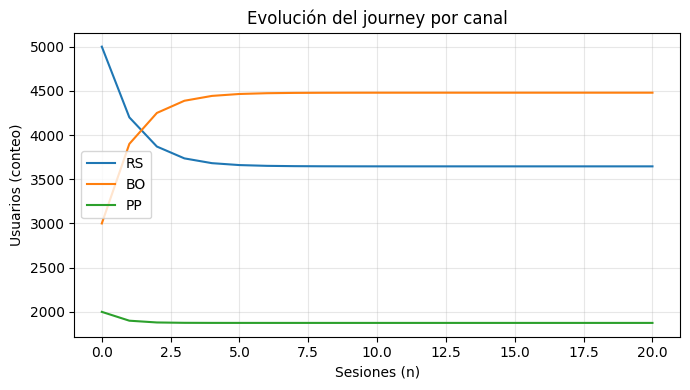

In [5]:
# (e) Visualización de la evolución del journey
import numpy as np
import matplotlib.pyplot as plt

pasos = 20
Vs = [v0_marketing @ np.linalg.matrix_power(P_marketing, n) for n in range(pasos + 1)]
counts = np.vstack(Vs).reshape(pasos + 1, 3)

plt.figure(figsize=(7,4))
plt.plot(range(pasos + 1), counts[:, 0], label="RS")
plt.plot(range(pasos + 1), counts[:, 1], label="BO")
plt.plot(range(pasos + 1), counts[:, 2], label="PP")
plt.xlabel("Sesiones (n)")
plt.ylabel("Usuarios (conteo)")
plt.title("Evolución del journey por canal")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Preguntas de análisis para el equipo de marketing digital

1. **¿Cuál canal tiene la mayor "pegajosidad"?** (retención = diagonal de P) — Respuesta: **BO** (0.65).
2. **¿Qué canal actúa más como "puente" hacia otros canales?** — Respuesta: **PP** (presenta la mayor salida hacia otros canales: 0.30→RS y 0.35→BO; en total 0.65 fuera de PP).
3. **Si reduces inversión en Publicidad Pagada, ¿cómo afecta el journey?** — Respuesta: Menor presencia de **PP** en el recorrido; la distribución tenderá más a **BO** (y parcialmente **RS**), con mayor recirculación RS↔BO. Impacto de corto plazo en las primeras sesiones; a largo plazo el sistema converge a un nuevo equilibrio con menor peso en PP.
4. **¿Vale la pena invertir en aumentar la retención de Redes Sociales?** — Respuesta: Potencialmente sí. Subir la retención de **RS** (0.60→más) reduce su tiempo medio de retorno (≈2.743 actualmente) y aumenta su peso estable; además, RS alimenta **BO** (0.25), lo que puede reforzar orgánico. Validar con una prueba controlada (ajustar fila RS manteniendo suma=1 y medir π y μ).
5. **¿Cuál es el ROI de aumentar el tráfico inicial de cada canal?** — Respuesta: Sin datos de costos/ingresos no se puede calcular ROI. A nivel de dinámica, el aumento de tráfico inicial produce un **impulso transitorio** (en 5–10 sesiones se acerca a π). Para ROI real, modelar CAC/LTV por canal y simular escenarios (p.ej., +10% en v0_RS, v0_BO, v0_PP) y comparar valor acumulado en las primeras N sesiones.

## Respuestas rápidas

- Canal con más tráfico a largo plazo: Búsqueda Orgánica (≈ 44.79%).
- Mayor retención (diagonal de P): Búsqueda Orgánica (0.65).
- Más probable ir a PP desde: RS y BO (empate en 0.15).
- Menor pegajosidad: Publicidad Pagada (0.35).
- Tiempos medios de retorno: RS ≈ 2.743, BO ≈ 2.233, PP ≈ 5.333 sesiones.


In [6]:
# Resumen automático de interpretación (basado en variables del notebook)
import numpy as np

canales = ["RS", "BO", "PP"]
P = P_marketing

# 1) Canal que gana más tráfico conforme avanza el journey: el de mayor peso en el estado estacionario
ganador_idx = int(np.argmax(pi))
print(f"1) Canal dominante a largo plazo: {canales[ganador_idx]} (pi = {pi[ganador_idx]:.6f})")

# 2) Canal con mayor retención (diagonal de P)
diag = np.diag(P)
ret_max_idx = int(np.argmax(diag))
print(f"2) Mayor retención: {canales[ret_max_idx]} (retención = {diag[ret_max_idx]:.2f})")

# 3) Desde qué canal es más probable ir a Publicidad Pagada (columna PP)
pp_col_idx = 2
from_idx = int(np.argmax(P[:, pp_col_idx]))
print(f"3) Más probable ir a PP desde: {canales[from_idx]} (prob = {P[from_idx, pp_col_idx]:.2f})")

# 4) Canal con menor pegajosidad (menor valor en la diagonal)
ret_min_idx = int(np.argmin(diag))
print(f"4) Menor pegajosidad: {canales[ret_min_idx]} (retención = {diag[ret_min_idx]:.2f})")

# Extras útiles
print("\nExtras:")
print("  Distribución tras 5 sesiones (conteo): RS={:,.0f}, BO={:,.0f}, PP={:,.0f}".format(v5[0,0], v5[0,1], v5[0,2]))
print("  Distribución tras 10 sesiones (conteo): RS={:,.0f}, BO={:,.0f}, PP={:,.0f}".format(v10[0,0], v10[0,1], v10[0,2]))
print("  Tiempos medios de retorno (sesiones): RS={:.3f}, BO={:.3f}, PP={:.3f}".format(mu[0], mu[1], mu[2]))

1) Canal dominante a largo plazo: BO (pi = 0.447917)
2) Mayor retención: BO (retención = 0.65)
3) Más probable ir a PP desde: PP (prob = 0.35)
4) Menor pegajosidad: PP (retención = 0.35)

Extras:
  Distribución tras 5 sesiones (conteo): RS=3,660, BO=4,465, PP=1,875
  Distribución tras 10 sesiones (conteo): RS=3,646, BO=4,479, PP=1,875
  Tiempos medios de retorno (sesiones): RS=2.743, BO=2.233, PP=5.333
